
# Covid Home Advantage Analysis

## Table showing the difference between points gained at home and away (same with xPoints) from 2014 to 2020 for the 6 championships

### Step 1 : Load and extract the required data

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/understat-football-matches-2014-2020.csv')

# Filter the data to only include matches from 2014 to 2018 seasons
data = data[(data['season'] >= 2014) & (data['season'] <= 2020)]

# Filter the data to only include the championships, season, h_a, pts and xpts columns
data = data[['championship', 'season', 'h_a', 'pts', 'xpts']]

data.head()

,championship,season,h_a,pts,xpts
0,Ligue 1,2014,h,1,2.6417
1,Ligue 1,2014,a,3,2.1913
2,Ligue 1,2014,h,3,1.7855
3,Ligue 1,2014,a,1,0.1353
4,Ligue 1,2014,h,3,1.7712


### Step 2 : Calculate the difference between points gained at home and away for each championship and season

In [3]:
# Total points gained at home and away for each championship and season
diff_pts = data.groupby(['championship', 'season', 'h_a'])['pts'].sum().unstack().fillna(0)
diff_pts['diff_pts'] = diff_pts['h'] - diff_pts['a']
diff_pts = diff_pts.reset_index()

# Same with xPoints
diff_xpts = data.groupby(['championship', 'season', 'h_a'])['xpts'].sum().unstack().fillna(0)
diff_xpts['diff_xpts'] = diff_xpts['h'] - diff_xpts['a']

# Combine the two dataframes by merging on championship, season with points and xPoints differences
data_diff = pd.merge(diff_pts, diff_xpts, on=['championship', 'season'])

### Step 3 : Display the table showing the difference

In [4]:
import pandas as pd

# Assuming your data is in `df`
df = data_diff.rename(columns={'championship': 'LEAGUE', 'season': 'YEAR', 'diff_pts': 'DIFF_POINTS_HOMEAWAY', 'diff_xpts': 'DIFF_XPOINTS_HOMEAWAY'})

# Ensure that we're working with only the relevant columns
df = df[['LEAGUE', 'YEAR', 'DIFF_POINTS_HOMEAWAY', 'DIFF_XPOINTS_HOMEAWAY']]

# Round the values to integers
df['DIFF_POINTS_HOMEAWAY'] = df['DIFF_POINTS_HOMEAWAY'].round(0).astype(int)
df['DIFF_XPOINTS_HOMEAWAY'] = df['DIFF_XPOINTS_HOMEAWAY'].round(0).astype(int)

# Use Styler.bar to add horizontal bars to DIFF_POINTS_HOMEAWAY and DIFF_XPOINTS_HOMEAWAY
def add_bars_to_table(df):
    # Apply the bar style to the columns
    styled_df = df.style.bar(subset=['DIFF_POINTS_HOMEAWAY'], color=['red', 'lightgreen'], width=100, align='zero') \
                        .bar(subset=['DIFF_XPOINTS_HOMEAWAY'], color=['red', 'lightgreen'], width=100, align='zero') \
                        .set_table_styles([
                            {'selector': 'thead th', 'props': [('background-color', '#f2f2f2')]},  # Header styling
                            {'selector': 'tbody td', 'props': [('padding', '8px')]},  # Cell padding for better visibility
                            {'selector': 'table', 'props': [('border-collapse', 'collapse')]},  # Table border-collapse
                            {'selector': 'td', 'props': [('min-width', '80px')]}  # Ensure cell width is wide enough
                        ]) \
                        .hide(axis='index')  # Hide the index column for cleaner display
    
    return styled_df

# Display the styled table
styled_table = add_bars_to_table(df)
styled_table

LEAGUE,YEAR,DIFF_POINTS_HOMEAWAY,DIFF_XPOINTS_HOMEAWAY
Bundesliga,2014,198,151
Bundesliga,2015,105,116
Bundesliga,2016,204,146
Bundesliga,2017,165,160
Bundesliga,2018,129,137
Bundesliga,2019,24,60
Bundesliga,2020,99,59
English Premier League,2014,171,205
English Premier League,2015,123,131
English Premier League,2016,234,154


### Conclusion

- We can see I have the same results as the paper.  

## Plotting the evolution of mean gained points (per match) for all seasons from 2014 and 2020

### Step 1 : Load and extract the required data


In [5]:
import pandas as pd

data = pd.read_csv('../data/understat-football-matches-2014-2020.csv')

# We only need the points, xPoints, result_away, xPointsAway, championships and season columns
data = data[['pts', 'xpts', 'h_a', 'championship', 'season']]

# Filter the data to only include matches from 2014 to 2020
data = data[(data['season'] >= 2014) & (data['season'] <= 2020)]

data.head()


,pts,xpts,h_a,championship,season
0,1,2.6417,h,Ligue 1,2014
1,3,2.1913,a,Ligue 1,2014
2,3,1.7855,h,Ligue 1,2014
3,1,0.1353,a,Ligue 1,2014
4,3,1.7712,h,Ligue 1,2014


### Step 2 : Calculate the mean gained points per match for each season


In [6]:
# Calculate the mean gained points and expected points per match for each season by grouping by championship, season, and home/away
mean_stats = data.groupby(['championship', 'season', 'h_a']).agg(
    mean_pts=('pts', 'mean'),
    mean_xpts=('xpts', 'mean')
).unstack().fillna(0)

# Rename columns for clarity
mean_stats.columns = ['result_away', 'result', 'xPointsAway', 'xPoints']

# Reset index to make 'championship' and 'season' columns
mean_stats.reset_index(inplace=True)



mean_stats.head()


,championship,season,result_away,result,xPointsAway,xPoints
0,Bundesliga,2014,1.042484,1.689542,1.130599,1.623660
1,Bundesliga,2015,1.212418,1.555556,1.195821,1.576480
2,Bundesliga,2016,1.045752,1.712418,1.144089,1.620920
3,Bundesliga,2017,1.094771,1.633987,1.120375,1.642388
4,Bundesliga,2018,1.169935,1.591503,1.172744,1.621818


### Step 3 : Plot the evolution of mean gained points per match for all seasons from 2014 to 2020


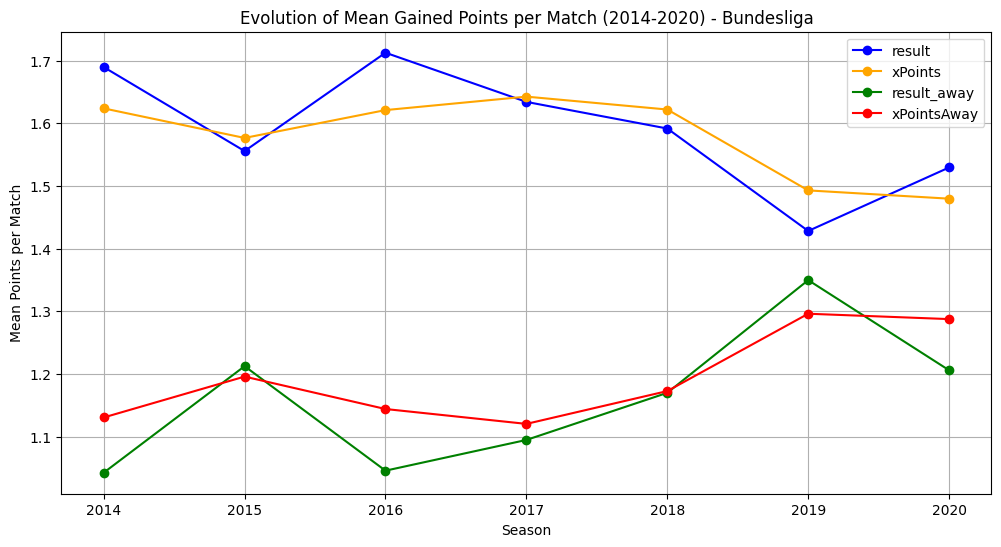

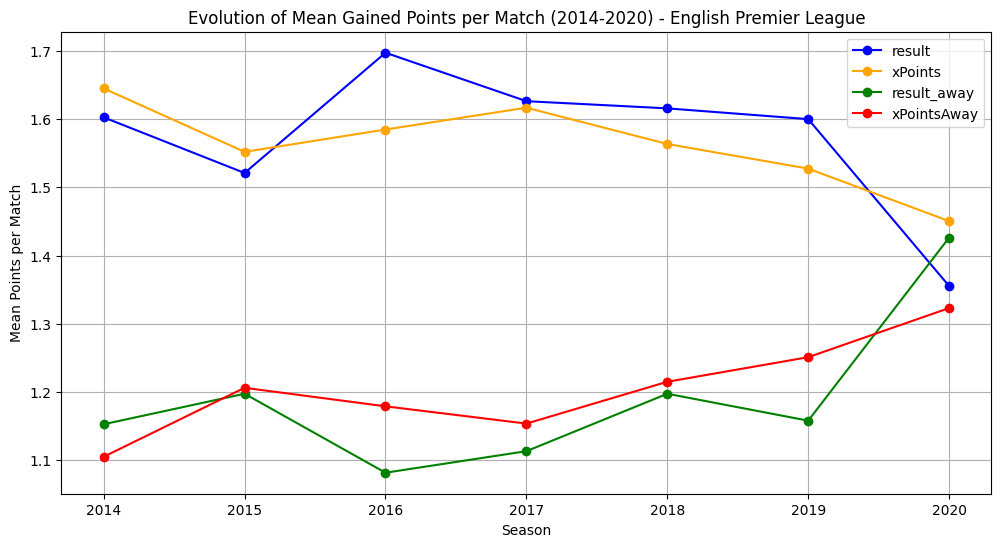

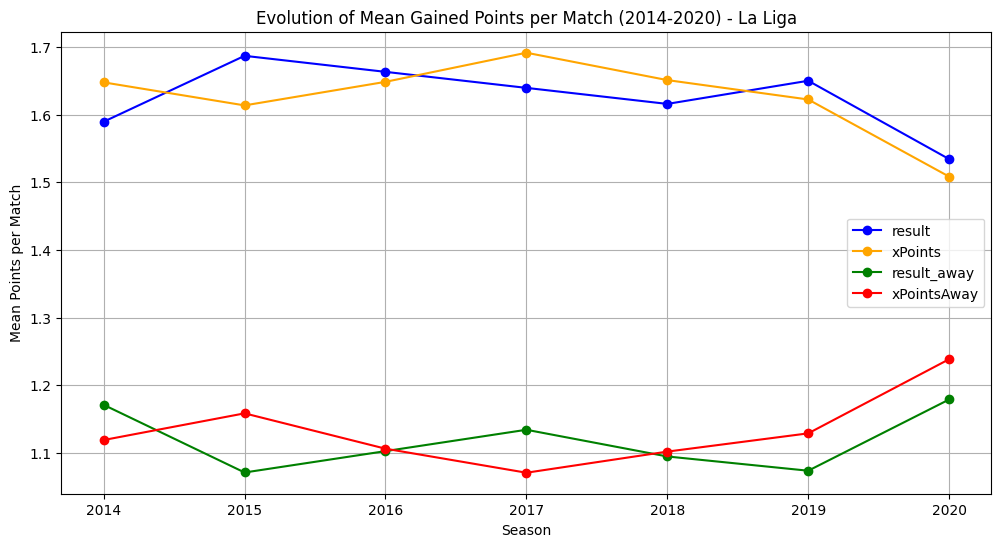

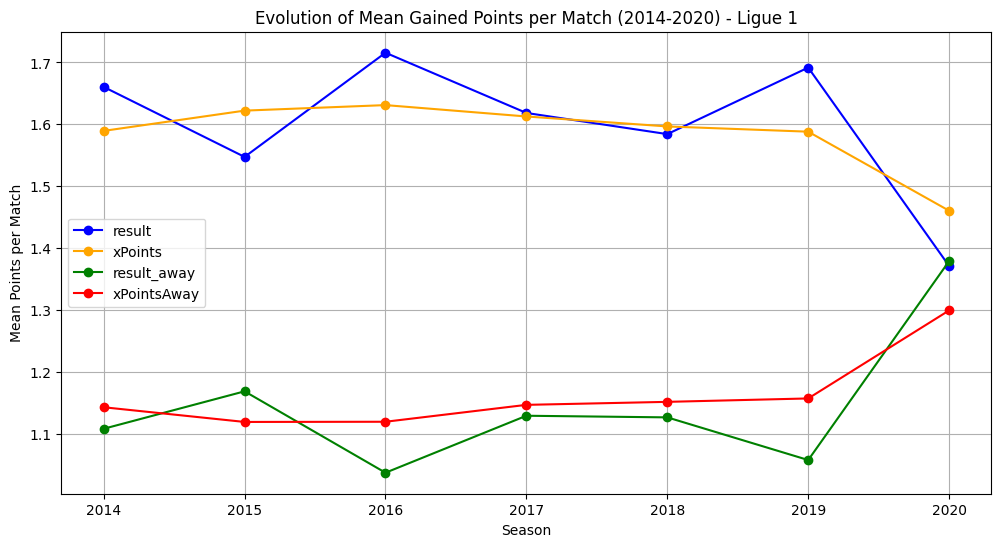

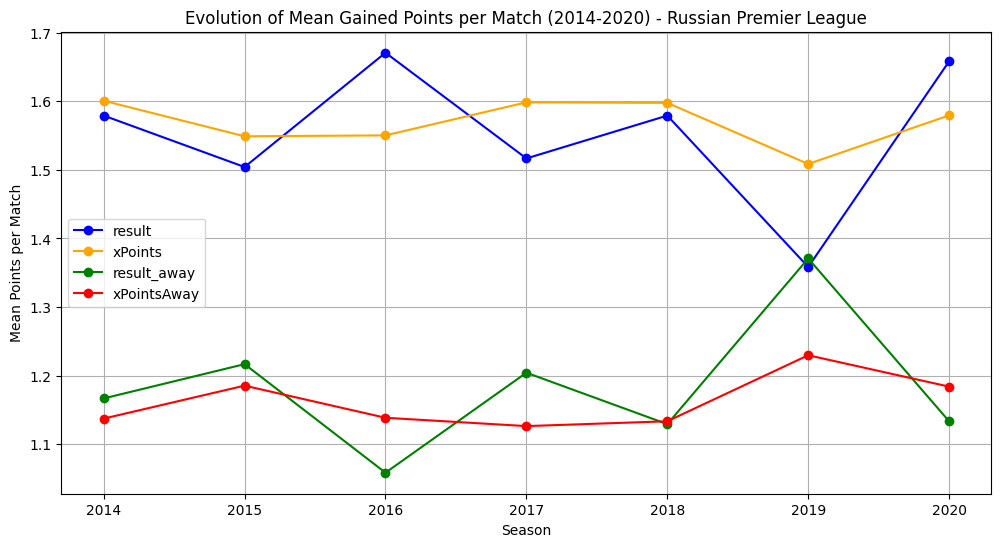

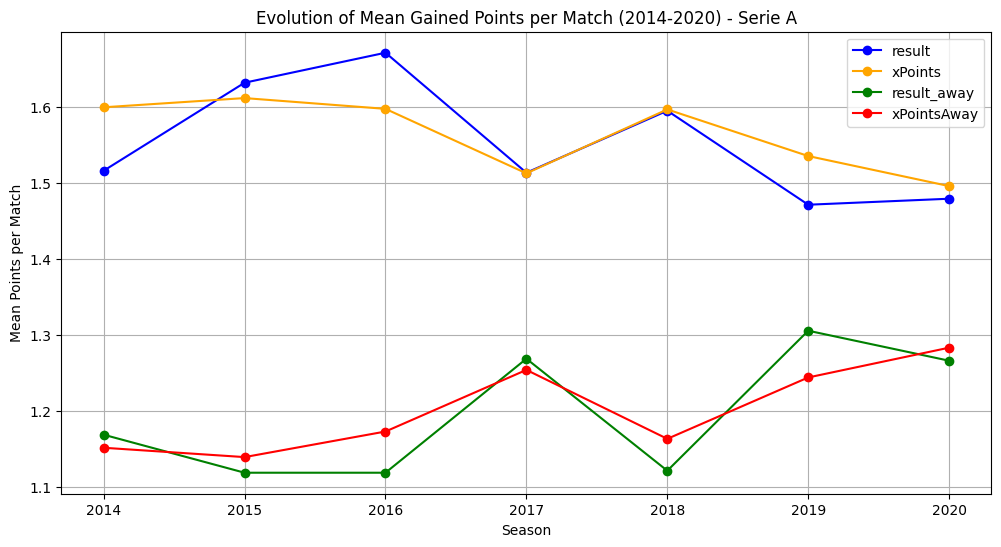

In [7]:
import matplotlib.pyplot as plt

# Plot the evolution of mean gained points per match for all seasons

for championship in mean_stats['championship'].unique():
    champ_data = mean_stats[mean_stats['championship'] == championship]
 
    plt.figure(figsize=(12, 6))
    plt.plot(champ_data['season'], champ_data['result'], label='result', marker='o', color='blue')
    plt.plot(champ_data['season'], champ_data['xPoints'], label='xPoints', marker='o', color='orange')
    plt.plot(champ_data['season'], champ_data['result_away'], label='result_away', marker="o", color='green')
    plt.plot(champ_data['season'], champ_data['xPointsAway'], label='xPointsAway', marker='o', color='red')
  
    plt.xlabel('Season')
    plt.ylabel('Mean Points per Match')
    plt.title('Evolution of Mean Gained Points per Match (2014-2020) - ' + championship)
    plt.legend()
    plt.grid(True)
    plt.show()


### Conclusion

- We can see that I have the same results as the paper.

## Non-parametrical Wilcoxon Signed-Rank test to assess differences between home and away matches, considering either actual result, xPoints, or xG

### Step 1 : Load and extract the required data

In [8]:
from scipy.stats import wilcoxon
import numpy as np
import pandas as pd

data = pd.read_csv('../data/understat-football-matches-2014-2020.csv')

data = data[(data['season'] >= 2014) & (data['season'] <= 2020)]

data = data[['championship', 'season', 'pts', 'xpts', 'xG', 'h_a']]

data.head()

,championship,season,pts,xpts,xG,h_a
0,Ligue 1,2014,1,2.6417,1.544680,h
1,Ligue 1,2014,3,2.1913,0.945961,a
2,Ligue 1,2014,3,1.7855,0.782421,h
3,Ligue 1,2014,1,0.1353,0.209403,a
4,Ligue 1,2014,3,1.7712,1.462930,h


### Step 2 : Perform the Wilcoxon Signed-Rank test for each championship and season

In [9]:
wilcoxon_results = []

for (championship, season), group in data.groupby(['championship', 'season']):
    home_data = group[group['h_a'] == 'h']
    away_data = group[group['h_a'] == 'a']
    
    if len(home_data) == len(away_data):

        wilco_points = wilcoxon(home_data['pts'], away_data['pts'])
        
        wilco_xpoints = wilcoxon(home_data['xpts'], away_data['xpts'])
        
        wilco_xg = wilcoxon(home_data['xG'], away_data['xG'])
        
        def compute_cohens_d(a, b):
            diff = a.mean() - b.mean()
            pooled_std = np.sqrt(((len(a) - 1) * a.std()**2 + (len(b) - 1) * b.std()**2) / (len(a) + len(b) - 2))
            return diff / pooled_std if pooled_std != 0 else np.nan
        
        cohens_d_points = compute_cohens_d(home_data['pts'], away_data['pts'])
        cohens_d_xpoints = compute_cohens_d(home_data['xpts'], away_data['xpts'])
        cohens_d_xg = compute_cohens_d(home_data['xG'], away_data['xG'])
        
        # Append results to the list
        wilcoxon_results.append({
            'league': championship,
            'season': season,
            'wilco-result': wilco_points.statistic,
            'wilco-result-pvalue': wilco_points.pvalue,
            'result-cohend': cohens_d_points,
            'wilco-xpoint': wilco_xpoints.statistic,
            'wilco-xpoints-pvalue': wilco_xpoints.pvalue,
            'xpoints-cohend': cohens_d_xpoints,
            'wilco-xg': wilco_xg.statistic,
            'wilco-xg-pvalue': wilco_xg.pvalue,
            'xg-cohend': cohens_d_xg
        })

wilcoxon_df = pd.DataFrame(wilcoxon_results)

### Step 3 : Format the results Table


In [10]:
# Highlight p-values < 0.05 and Cohen's d thresholds
def highlight_pval(val):
    return "background-color: red" if val < 0.05 else ""

def highlight_cohens_d(val):
    if val < 0.2:
        return "background-color: yellow"
    elif 0.2 <= val < 0.5:
        return "background-color: orange"
        
        return "background-color: red"
    return ""

styled_wilcoxon_df = wilcoxon_df.style.applymap(highlight_pval, subset=['wilco-result-pvalue', 'wilco-xpoints-pvalue', 'wilco-xg-pvalue']) \
                                       .applymap(highlight_cohens_d, subset=['result-cohend', 'xpoints-cohend', 'xg-cohend'])

styled_wilcoxon_df

C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\2996571432.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_wilcoxon_df = wilcoxon_df.style.applymap(highlight_pval, subset=['wilco-result-pvalue', 'wilco-xpoints-pvalue', 'wilco-xg-pvalue']) \
C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\2996571432.py:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cohens_d, subset=['result-cohend', 'xpoints-cohend', 'xg-cohend'])


,league,season,wilco-result,wilco-result-pvalue,result-cohend,wilco-xpoint,wilco-xpoints-pvalue,xpoints-cohend,wilco-xg,wilco-xg-pvalue,xg-cohend
0,Bundesliga,2014,5550.000000,0.000000,0.512082,11660.000000,0.000000,0.656084,13479.000000,0.000000,0.494055
1,Bundesliga,2015,6916.500000,0.000981,0.259479,14055.500000,0.000000,0.458798,15093.000000,0.000000,0.400803
2,Bundesliga,2016,5251.000000,0.000000,0.519632,12081.000000,0.000000,0.597053,14459.000000,0.000000,0.469160
3,Bundesliga,2017,5128.000000,0.000000,0.423421,11373.500000,0.000000,0.668095,13729.000000,0.000000,0.510562
4,Bundesliga,2018,5290.500000,0.000035,0.321458,13264.500000,0.000000,0.524064,15887.000000,0.000001,0.400589
5,Bundesliga,2019,9463.500000,0.466960,0.058499,18458.000000,0.001172,0.228196,19437.000000,0.008959,0.166438
6,Bundesliga,2020,7010.000000,0.002147,0.249430,18533.000000,0.001388,0.234553,19419.000000,0.008659,0.221322
7,English Premier League,2014,9226.500000,0.000001,0.345195,15262.500000,0.000000,0.740617,19612.000000,0.000000,0.556300
8,English Premier League,2015,10941.500000,0.000467,0.252358,23636.000000,0.000000,0.437532,26454.000000,0.000005,0.345494
9,English Premier League,2016,6807.000000,0.000000,0.471545,21308.000000,0.000000,0.490595,23524.000000,0.000000,0.412790


### Conclusion

- Here, there is some differcences with the paper. The cohend d values are the same as the paper but the p-values and the statistics are different. They still are pretty close to the paper's results.

## Non-parametrical Mann-Whitney U test to assess differences between seasons (in terms of actual results home and xPoints home)

### Step 1 : Load and extract the required data

In [11]:
import pandas as pd

df = pd.read_csv('../data/understat-football-matches-2014-2020.csv')

df = df[(df['season'] >= 2014) & (df['season'] <= 2020)]

df = df[['championship', 'season', 'xpts', 'h_a']]

# Filter the data to only include home
df = df[df['h_a'] == 'h']

### Step 2 : Perform the Mann-Whitney U test for each championship

In [ ]:

import pandas as pd
import numpy as np
import scipy.stats as stats

leagues = df['championship'].unique()

def compute_mannwhitney_by_league(league, df):

    league_data = df[df['championship'] == league]
    
    seasons = sorted(league_data['season'].unique())
    
    p_values = []

    # Perform Mann-Whitney U test for each pair of seasons
    for season1 in seasons:
        row = []
        for season2 in seasons:
            data1 = league_data[league_data['season'] == season1]['xpts']
            data2 = league_data[league_data['season'] == season2]['xpts']
            
            stat, p_value = stats.mannwhitneyu(data1, data2)
            
            row.append(p_value)
        p_values.append(row)

    p_value_df = pd.DataFrame(p_values, columns=[str(s) for s in seasons], index=[str(s) for s in seasons])

    # Remove the upper triangular part (above the diagonal) to show only the lower part
    lower_triangular_mask = np.tril(np.ones(p_value_df.shape), k=-1).astype(bool)
    p_value_df = p_value_df.where(lower_triangular_mask)

    def highlight(p_value):
        if p_value < 0.05:
            return 'color: red'
        return ''

    styled_df = p_value_df.style.applymap(highlight)

    return styled_df

for league in leagues:
    print(f"\n{league} xPoints Change Significance with Mann-Whitney U Test")
    styled_table = compute_mannwhitney_by_league(league, df)
    
    display(styled_table)



Ligue 1 xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.503489,nan,nan,nan,nan,nan,nan
2016,0.414275,0.896931,nan,nan,nan,nan,nan
2017,0.642557,0.973902,0.832632,nan,nan,nan,nan
2018,0.920636,0.614647,0.527388,0.714626,nan,nan,nan
2019,0.950469,0.562631,0.458905,0.659936,0.905229,nan,nan
2020,0.025709,0.006052,0.003217,0.011353,0.021600,0.044924,nan



English Premier League xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.123055,nan,nan,nan,nan,nan,nan
2016,0.414370,0.519108,nan,nan,nan,nan,nan
2017,0.817066,0.238897,0.582968,nan,nan,nan,nan
2018,0.208613,0.835856,0.785267,0.417115,nan,nan,nan
2019,0.065263,0.748807,0.387872,0.155471,0.519001,nan,nan
2020,0.001544,0.095714,0.031442,0.007875,0.065746,0.204634,nan



La Liga xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.594129,nan,nan,nan,nan,nan,nan
2016,0.926410,0.611515,nan,nan,nan,nan,nan
2017,0.608968,0.249129,0.524261,nan,nan,nan,nan
2018,0.802978,0.622217,0.870065,0.409567,nan,nan,nan
2019,0.560277,0.998945,0.588651,0.232695,0.678707,nan,nan
2020,0.020504,0.082175,0.020857,0.002547,0.019873,0.060905,nan



Serie A xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.761616,nan,nan,nan,nan,nan,nan
2016,0.984708,0.841926,nan,nan,nan,nan,nan
2017,0.143576,0.100411,0.180836,nan,nan,nan,nan
2018,0.985236,0.725010,0.949410,0.157549,nan,nan,nan
2019,0.289548,0.215267,0.300905,0.704295,0.329308,nan,nan
2020,0.100753,0.064138,0.099423,0.778162,0.116723,0.537368,nan



Bundesliga xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.462755,nan,nan,nan,nan,nan,nan
2016,0.997264,0.526557,nan,nan,nan,nan,nan
2017,0.666011,0.318321,0.778908,nan,nan,nan,nan
2018,0.815082,0.451273,0.900843,0.873936,nan,nan,nan
2019,0.056712,0.225901,0.065949,0.034965,0.074106,nan,nan
2020,0.026103,0.148947,0.030039,0.012406,0.034906,0.847175,nan



Russian Premier League xPoints Change Significance with Mann-Whitney U Test


C:\Users\Noé\AppData\Local\Temp\ipykernel_18180\3215014168.py:38: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = p_value_df.style.applymap(highlight)


,2014,2015,2016,2017,2018,2019,2020
2014,nan,nan,nan,nan,nan,nan,nan
2015,0.488927,nan,nan,nan,nan,nan,nan
2016,0.482339,0.985823,nan,nan,nan,nan,nan
2017,0.955914,0.476614,0.493485,nan,nan,nan,nan
2018,0.961158,0.491825,0.483981,0.978736,nan,nan,nan
2019,0.184910,0.538110,0.499945,0.165243,0.167764,nan,nan
2020,0.803538,0.656874,0.667375,0.889818,0.918227,0.324682,nan


### Conclusion

